# Laboratory 2.3: Linear Regression

In this practice you will build your own Linear Regression model. As you _should_ remember, we have seen in class how to obtain the optimal values for the parameters in a linear regression model. If you need to refresh your memory, check the slides from theory for the formula for the model optimization.

For the final part of this practice you will also need the following dataset:
- **winequality.csv**: Dataset with several input variables and a continuous output variable to determine wine quality. You can get more information from the [original repository](https://archive.ics.uci.edu/dataset/186/wine+quality).


In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)

In [1]:
# Import here whatever you may need
import numpy as np
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

from src.lab_2_3_LinearRegression import LinearRegressor, evaluate_regression, sklearn_comparison, anscombe_quartet

In [2]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

In [3]:
### Train your linear regression model
linreg = LinearRegressor()
# creamos el objeto y le pasamos los datos -> llamamos a fit simple para que calcule y = mx + b óptimas que se ajusten a los datos. 
linreg.fit_simple(x, y)


print(linreg.intercept) #vemos qué nos da la b
print(linreg.coefficients) #vemos qué nos da la w 

1.2181818181818187
1.0363636363636364


Ajustando el modelo a una recta empleando las diferentes fórmulas, tenemos que para estos datos, su regresion lineal óptima tiene pinta de 
y = 1.2181818181818187 + x 1.0363636363636364



In [4]:
# Obtain regression performance metrics

y_pred = linreg.predict(x)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9201359388275275, 'RMSE': 1.0126472956832235, 'MAE': 0.8945454545454549}


Probando directamente el modelo, usamos las x de nuestros datos para ver cómo de diferentes son los resultados que nos da el modelo frente a los reales. 
Vemos que el R^2 es muy alto y el error considerablemente bajo, por lo que podemos deducir que es un buen modelo a priori

### Scikit-Learn comparison

In [5]:
### Compare your model with sklearn linear regression model

results = sklearn_comparison(x, y, linreg)


Custom Model Coefficient: 1.0363636363636364
Custom Model Intercept: 1.2181818181818187
Scikit-Learn Coefficient: 1.0363636363636366
Scikit-Learn Intercept: 1.218181818181817


Vemos que es prácticamente el mismo modelo, devolviendo los mismos parámetros que hemos calculado para crear el modelo. 
Esto nos lleva a deducir que , usando una simple fórmula, podemos hallar el mismo resultado en lugar de emplear librerías externas. 
Ademas, nos lleva a deducir que el proceso detrás de scikit-learn es el mismo que el nuestro 

### Anscombe's quartet

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
anscombe, datasets, models, results = anscombe_quartet()

Dataset I: Coefficient: 0.5000909090909091, Intercept: 3.0000909090909103
R2: 0.666542459508775, RMSE: 1.1185497916336296, MAE: 0.8374049586776859
Dataset II: Coefficient: 0.49999999999999994, Intercept: 3.000909090909091
R2: 0.6662420337274843, RMSE: 1.1191023557497448, MAE: 0.967933884297521
Dataset III: Coefficient: 0.49972727272727274, Intercept: 3.0024545454545457
R2: 0.6663240410665592, RMSE: 1.118285693623049, MAE: 0.7159669421487604
Dataset IV: Coefficient: 0.49990909090909097, Intercept: 3.0017272727272726
R2: 0.6667072568984653, RMSE: 1.1177286221293936, MAE: 0.902727272727273


**Questions:** What do you think about the fit? Do you notice something? Comment it here below:

'Podemos ver que las métricas son muy parecidas entre los cuatro datasets, indicándonos que debemos ver estos resultados de manera gráfica para ver mejor su comportamiento. 

Analizando a simple vista por los resultados, vemos que un R^2 positivo indica, por un lado, que el modelo se ajusta bien a los datos, pero no es perfecto. 
Tambien nos indica que la correlación entre las variables x e y del modelo no es muy fuerte.  ' 



Once all models are trained (one for each dataset), we will plot the results of the fit alongside each point set

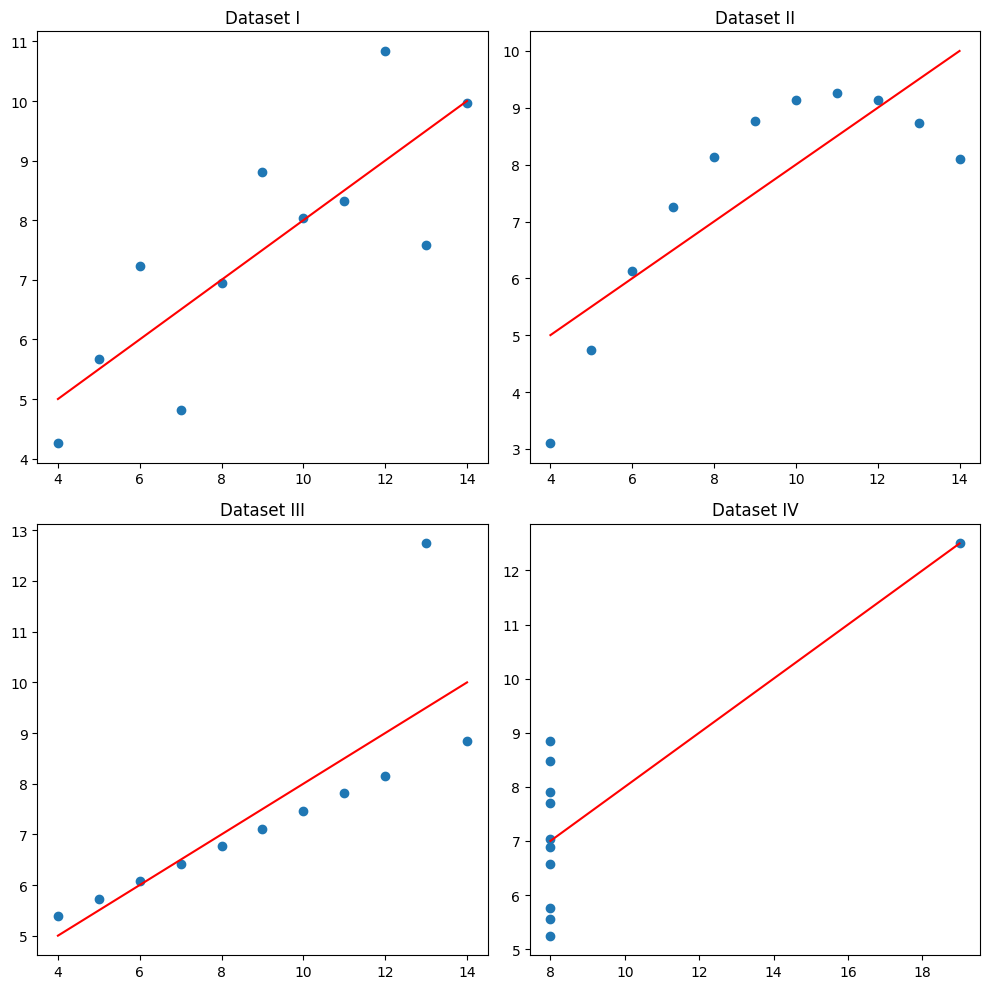

In [24]:
# Visualizing the datasets with their regression lines
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i, dataset in enumerate(datasets):
   
    # TODO: Select the dataset for each case
    #cogemos los datos X e Y obtenidos de cada dataset de anscombe 

    data = anscombe[anscombe["dataset"] == dataset]
    X = np.array(data["x"])
    y = np.array(data["y"])


    # ordenamos los indices 
    sorted_indices = np.argsort(X)
    X_sorted = X[sorted_indices]
    y_sorted = y[sorted_indices]

    #creamos el scatter plot para este dataset 
    axs[i].scatter(X, y)
    model = models[dataset]
    y_pred = model.predict(X_sorted)

    # TODO: Plot the data and the fit (fill the "None" value)
    axs[i].plot(X_sorted, y_pred, color='red')  # Regression line
    axs[i].set_title(f"Dataset {dataset}")

# los ploteamos todos a la vez : 
plt.tight_layout()
plt.show()


Vemos que, al comparar los cuartetos del anscombe, a pesar de tener las mismas métricas, los modelos estimados no tienen nada que ver, y por ende nos recalca la importancia de tomar más medidas para asegurarnos de que nuestro modelo es el correcto. 

### Multiple variable linear regression

In this section, we are going to use the dataset of the quality of red wines based on chemical measurements. The original dataset can be found in the [UCI Repository](https://archive.ics.uci.edu/dataset/186/wine+quality).

In [19]:
import pandas as pd

wine_data = pd.read_csv("winequality.csv", sep=';')

In [25]:
# Divide dataset between inputs and output
inputs = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
output = 'quality'

X = wine_data[inputs]. to_numpy() 
y = wine_data[output]. to_numpy() 

In [28]:
# Train multiple regression model
linreg_multiple = LinearRegressor()
linreg_multiple.fit_multiple(X, y)
print (linreg.coefficients)
print(linreg.intercept)

1.0363636363636364
1.2181818181818187


In [29]:
# Obtain regression performance metrics
y_pred = linreg_multiple.predict(X)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.36055170303868833, 'RMSE': 0.6455750670692045, 'MAE': 0.5004899636326715}


En este caso, por otro lado, vemos que el R2 es bastante más bajo. Esto nos puede indicar que los datos no están muy correlacionados entre sí. 